In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("prokabaddi.csv")

In [3]:
df.head()

,match_no,stage,team1,team2,team1_score,team2_score,date,location,season
0,1,League,U Mumba,Jaipur Pink Panthers,45,31,26-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
1,2,League,Dabang Delhi KC,Bengaluru Bulls,28,47,27-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
2,3,League,Bengaluru Bulls,Puneri Paltan,40,37,28-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
3,4,League,U Mumba,Bengal Warriors,36,25,29-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1
4,5,League,Puneri Paltan,Dabang Delhi KC,31,35,30-07-2014,"Dome@NSCI Svp Stadium, Mumbai, Mumbai",1


In [4]:
df.tail()

,match_no,stage,team1,team2,team1_score,team2_score,date,location,season
785,33,Eliminator 1,UP Yoddha,Puneri Paltan,42,31,21-02-2022,"Sheraton Grand Convention Center, Bangalore",8
786,34,Eliminator 2,Gujarat Giants,Bengaluru Bulls,29,49,21-02-2022,"Sheraton Grand Convention Center, Bangalore",8
787,35,Semi Final,Patna Pirates,UP Yoddha,38,27,23-02-2022,"Sheraton Grand Convention Center, Bangalore",8
788,36,Semi Final,Dabang Delhi KC,Bengaluru Bulls,40,35,23-02-2022,"Sheraton Grand Convention Center, Bangalore",8
789,37,Final,Patna Pirates,Dabang Delhi KC,36,37,25-02-2022,"Sheraton Grand Convention Center, Bangalore",8


In [5]:
df.shape

(790, 9)

In [6]:
df.describe()

,match_no,team1_score,team2_score,season
count,790.000000,790.000000,790.000000,790.000000
mean,37.984810,32.525316,32.713924,5.282278
std,26.209157,7.153309,7.810602,2.152622
min,0.000000,15.000000,15.000000,1.000000
25%,17.000000,27.250000,27.000000,4.000000
50%,33.000000,32.000000,32.000000,6.000000
75%,55.000000,37.000000,37.000000,7.000000
max,99.000000,69.000000,69.000000,8.000000


In [7]:
df.columns

Index(['match_no', 'stage', 'team1', 'team2', 'team1_score', 'team2_score',
       'date', 'location', 'season'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match_no     790 non-null    int64 
 1   stage        790 non-null    object
 2   team1        790 non-null    object
 3   team2        790 non-null    object
 4   team1_score  790 non-null    int64 
 5   team2_score  790 non-null    int64 
 6   date         790 non-null    object
 7   location     790 non-null    object
 8   season       790 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 55.7+ KB


In [9]:
df.isnull().sum()

match_no       0
stage          0
team1          0
team2          0
team1_score    0
team2_score    0
date           0
location       0
season         0
dtype: int64

In [10]:
df.nunique()

match_no       100
stage           17
team1           13
team2           13
team1_score     41
team2_score     46
date           467
location        30
season           8
dtype: int64

In [11]:
df['team1'].unique()

array(['U Mumba', 'Dabang Delhi KC', 'Bengaluru Bulls', 'Puneri Paltan',
       'Bengal Warriors', 'Jaipur Pink Panthers', 'Telugu Titans',
       'Patna Pirates', 'Gujarat Fortunegiants', 'Haryana Steelers',
       'UP Yoddha', 'Tamil Thalaivas', 'Gujarat Giants'], dtype=object)

In [112]:
df.drop('date',axis='columns',inplace=True)

KeyError: "['date'] not found in axis"

In [113]:
U_Mumba_Matches_Team1= df[df ['team1'] == 'U Mumba']

In [114]:
U_Mumba_Matches_Team1.head()

,match_no,team1,team2,team1_score,team2_score,season
0,1,U Mumba,Jaipur Pink Panthers,45,31,1
3,4,U Mumba,Bengal Warriors,36,25,1
5,6,U Mumba,Telugu Titans,35,35,1
6,7,U Mumba,Patna Pirates,36,33,1
16,17,U Mumba,Puneri Paltan,44,28,1


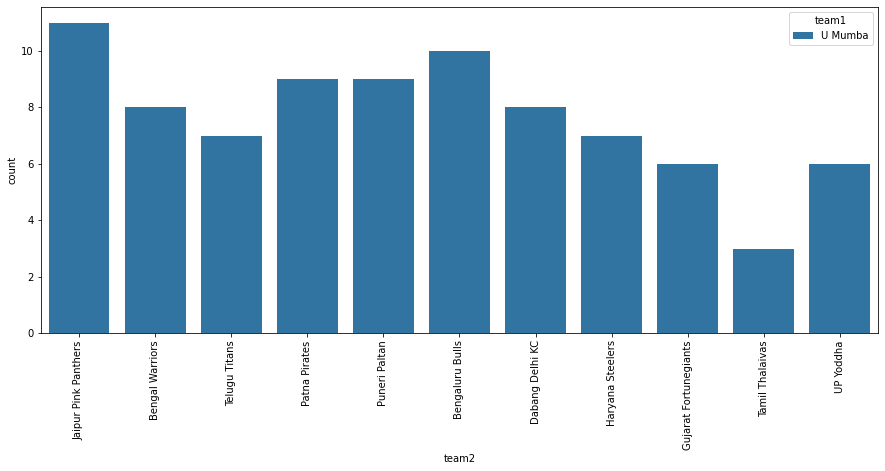

In [115]:
plt.figure(figsize=(15,6))
sns.countplot('team2' , hue='team1', data= U_Mumba_Matches_Team1)
plt.xticks(rotation = 90)
plt.show()

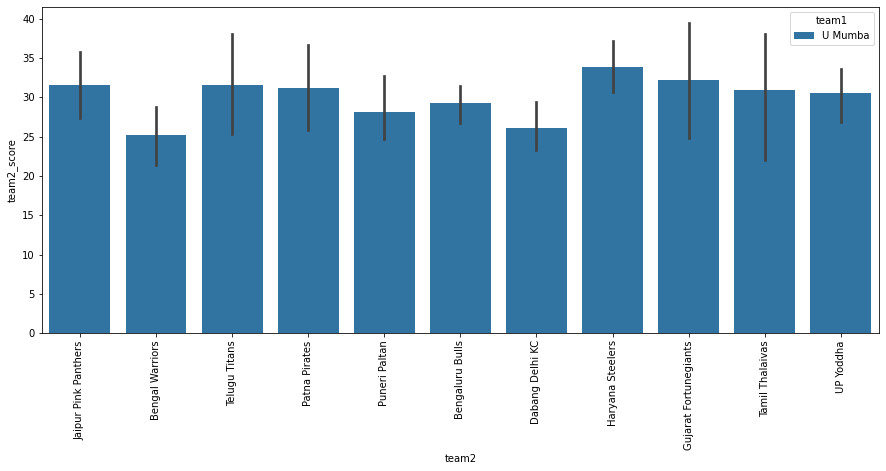

In [116]:
plt.figure(figsize=(15,6)) 
sns.barplot(x= 'team2', y ='team2_score',hue= 'team1', data= U_Mumba_Matches_Team1) 
plt.xticks(rotation = 90) 
plt.show()

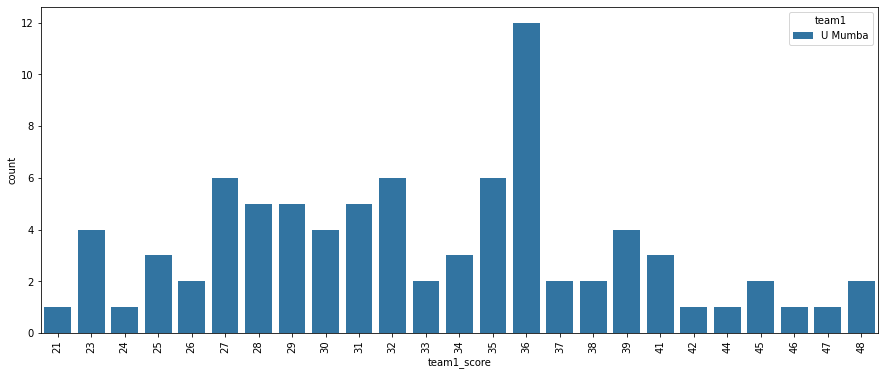

In [117]:
plt.figure(figsize=(15,6)) 
sns.countplot('team1_score',hue = 'team1' ,data = U_Mumba_Matches_Team1)
plt.xticks(rotation = 90) 
plt.show()

In [118]:
conditions= [U_Mumba_Matches_Team1['team1_score'] > U_Mumba_Matches_Team1['team2_score'],
             U_Mumba_Matches_Team1['team1_score'] < U_Mumba_Matches_Team1['team2_score']]


In [119]:
choices = ['winner','loose']

In [120]:
U_Mumba_Matches_Team1['result'] = np.select(conditions, choices, default='Tie')

In [121]:
U_Mumba_Matches_Team1.head()

,match_no,team1,team2,team1_score,team2_score,season,result
0,1,U Mumba,Jaipur Pink Panthers,45,31,1,winner
3,4,U Mumba,Bengal Warriors,36,25,1,winner
5,6,U Mumba,Telugu Titans,35,35,1,Tie
6,7,U Mumba,Patna Pirates,36,33,1,winner
16,17,U Mumba,Puneri Paltan,44,28,1,winner


In [122]:
U_Mumba_Matches_Team1.shape

(84, 7)

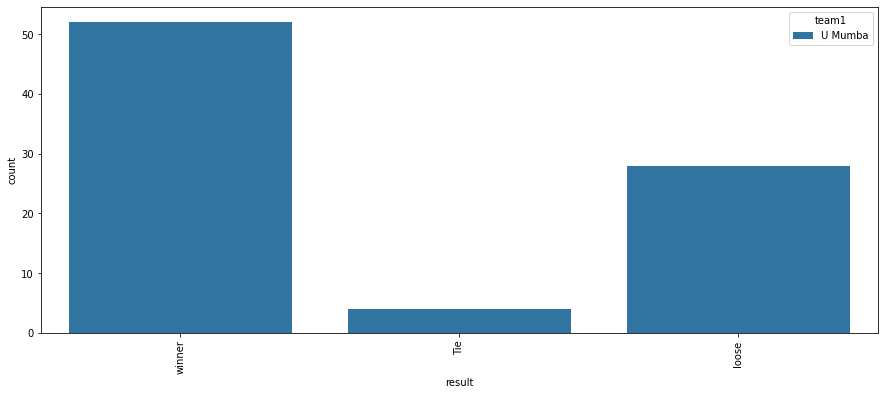

In [123]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'result',hue='team1', data = U_Mumba_Matches_Team1)
plt.xticks(rotation = 90)
plt.show()

In [124]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [125]:
U_Mumba_Matches_Team1['result']= label_encoder.fit_transform(U_Mumba_Matches_Team1['result'])

In [126]:
U_Mumba_Matches_Team1['team1']= label_encoder.fit_transform(U_Mumba_Matches_Team1['team2'])

In [127]:
U_Mumba_Matches_Team1['team2']= label_encoder.fit_transform(U_Mumba_Matches_Team1['team2'])


In [128]:
U_Mumba_Matches_Team1['location']

KeyError: 'location'

In [129]:
#X=U_Mumba_Matches_Team1.iloc[:,:-1].values
#Y=U_Mumba_Matches_Team1.iloc[:,-1].values

X = U_Mumba_Matches_Team1.drop(['result'], axis=1)
y = U_Mumba_Matches_Team1['result']

In [130]:
X

,match_no,team1,team2,team1_score,team2_score,season
0,1,5,5,45,31,1
3,4,0,0,36,25,1
5,6,9,9,35,35,1
6,7,6,6,36,33,1
16,17,7,7,44,28,1
...,...,...,...,...,...,...
730,78,1,1,45,34,8
747,95,8,8,35,33,8
755,3,6,6,36,47,8
763,11,0,0,37,27,8


In [131]:
###x= U_Mumba_Matches_Team1.drop(['match_no', 'stage', 'team1_score', 'team2_score','date', 'location', 'season', 'result'], axis =1)
#y_pred = model.predict(X_test)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [134]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [135]:
y_pred = model.predict(X_test)

In [111]:
print("Testing Accuracy :", model.score(X_test, y_test))

ValueError: could not convert string to float: '02-08-2019'